In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sms
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

In [2]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Aim?
- We would like to predict the price of a used car depending on its specifications

## Preprocessing
### Exploring the descriptive statistics of the variables

In [3]:
raw_data.describe(include='all') #describes statistics for all the data irrespective of numerical or categorical

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


Step 1: Observe for missing values by watching at the count

For the above data:
- There are 312 unique models, its really hard to implement the regression, with our current knowledge that would mean moe than 300 dummies should be created for models.
- Another obeservation is most common category, and below that its frequency.
    - There are 3947 registrations with Yes, looks like this variable won't be useful

In [4]:
data = raw_data.drop(['Model'], axis=1) # axis 0 is columns and axis 1 is rows
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Dealing with missing values
### From the above:
- The Brand, Body, Mileage, EngineType, Registration, Year has no missing values.

In [5]:
data.isnull() # easy way to check for missing values, here Ture stands for missing values.

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [6]:
data.isnull().sum() #this will sum all the missing values and results the data

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

**Rule of thumb:** if you are removing <5% of the observations, you are free to just remove all that have missing values.

In [7]:
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Exploring the PDF's(Probability Distribution Functions)

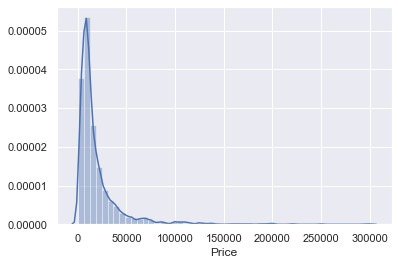

In [8]:
sns.distplot(data_no_mv['Price']) # For the optimal results we would be looking for a normal distribution

### Dealing with Outliers
The above plot is exponential, lets examin the descriptives:
Price has a mean of 19552, min of 600, max of 300000, check the discriptives.
By the above we can say that there are few outliers in the price variable,

**Outliers:** Observations that Lie on abnormal distance from other observations in the data.

They will effect the regression dramatically, so one way to deal with outliers seemlessly is to remove top1% of observations.
The simplest way to do this using Quantile method:

DataFrame.quantile(the quantile)returns the value at the given quantile(=np.percentile)

To get the 99th percentile and keep the data below it we use 0.99

In [9]:
q_price = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q_price]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


While the maximum value is still far away from Mean but it is acceptably closer.
Lets plot disct plot for the above data and check the disctribution.

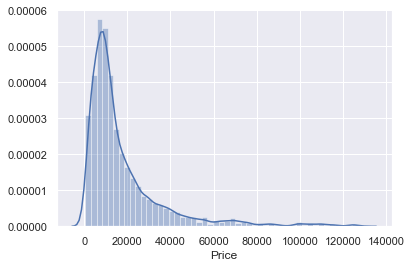

In [10]:
sns.distplot(data_1['Price'])

Lets plot the graph for milage and repate the same

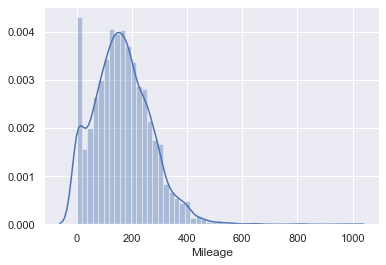

In [11]:
sns.distplot(data_1['Mileage'])

Since the above plot has many outliers, so lets deal with the outliers following previous method.

In [12]:
q_mileage = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q_mileage]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


Now lets plot the PDF for Mileage:

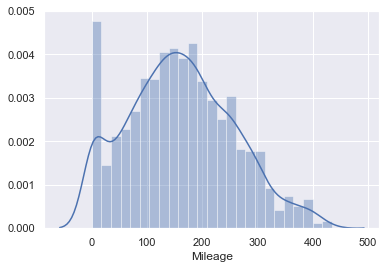

In [13]:
sns.distplot(data_2['Mileage'])

Lets examin the values of Engine Volume:

In [14]:
EngV = pd.DataFrame(raw_data['EngineV'])
EngV = EngV.dropna(axis=0)
EngV.sort_values(by='EngineV')

,EngineV
2512,0.60
188,0.65
3295,1.00
2725,1.00
1923,1.00
...,...
1311,99.99
3114,99.99
1264,99.99
3641,99.99


### Note
From the above data we can see the Engine Volume is provided as 99.99, 75, 66, 55 and etc,.. but no where the Engine Volume is of this huge, this might happen when there is no data found then analyst just enters as so values similar to 99.99, it is of worst practice. these are not usual values, from google we can see that engine volums fall from 0.6 to 6.5.

So lets remove the data which has the engine volum greater than 6.5

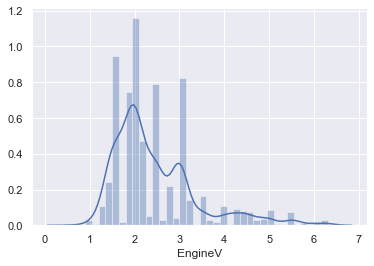

In [15]:
data_3 = data_2[data_2['EngineV']<6.5]
sns.distplot(data_3['EngineV'])

Now we will deal with year:


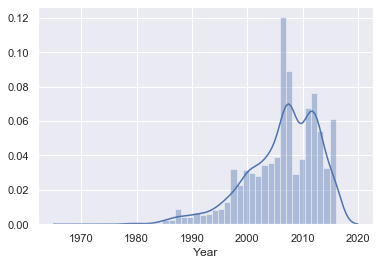

In [16]:
sns.distplot(data_3['Year'])

From the above plot we can see that the most of cars are newer, so now lets take 1 quartile and remain all other data as it

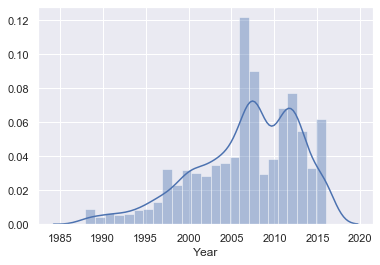

In [17]:
q_year = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q_year]
sns.distplot(data_4['Year'])

In [18]:
data_4

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


Currently the indices refer to all the data(including the observations we removed), lets reset the index using reset_index, option _drop=True_ since we have to drop the empty rows.

In [19]:
data_cleaned = data_4.reset_index(drop=True)

In [20]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


#### Note:
Overall we have deleted over 250 Observations, but those won't be usefull to us

## Checking the OLS assumptions:

### 1. Linearity

Lets check the linearity using the scatter plot


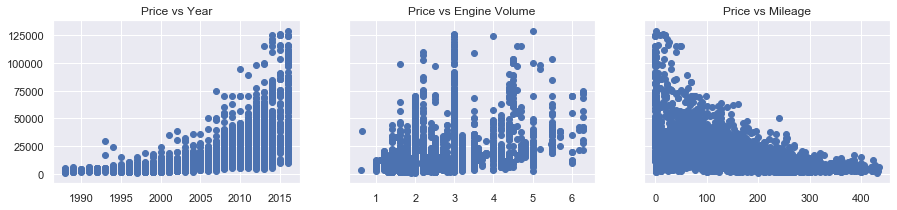

In [21]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))

ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price vs Year')

ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price vs Engine Volume')

ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price vs Mileage')

plt.show()

From the above we can spot patterns but definitely not the Linear patterns.
We cannot run Linear regression in this place.
Let's examin the Price plot:


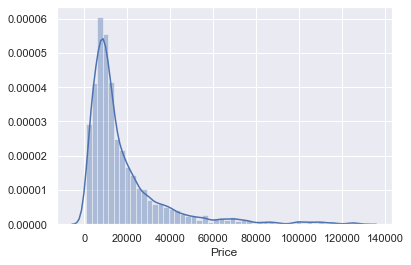

In [22]:
sns.distplot(data_cleaned['Price'])

The Price plot is not normally distributed, so lets Now here comes we can use **log transformations** of Price.

Numpy has a method to transform the data into log :

*np.log(x)*: returns the natural logarithm of a number or array of numbers

In [23]:
log_price =  np.log(data_cleaned['Price'])
log_price.head()

0     8.342840
1     8.974618
2     9.495519
3    10.043249
4     9.814656
Name: Price, dtype: float64

In [24]:
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


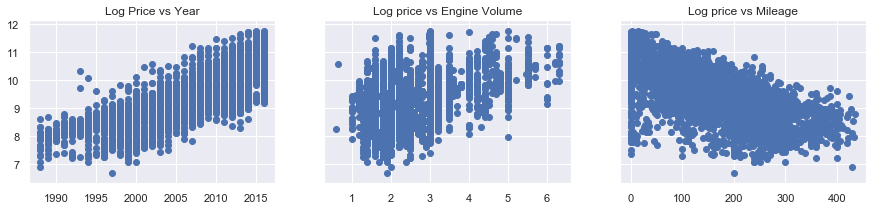

In [25]:
# lets plot the data and find the difference:

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))

ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Price vs Year')

ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Log price vs Engine Volume')

ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Log price vs Mileage')

plt.show()

We can see the linear patterns from above plots,
so lets drop the orginal colum of price.

In [26]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

In [27]:
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


### 2. No Endogeneity
There is no corellation between each independent variables, The assemption is not voilated, so there is no *No Endogeneity*

### 3. Normality and Homoscedasticity
- Normality *we made it hormal using log transformation*
- Zero Mean
- Homoscedasticity *Obviously exists because we implemented log transformation*

### 4. No Autocorrelation
- The observations that we have are not coming from time series data or panel data, so there is no autocorrelation.

### 5. Multicollinearity
- It is logical that 'Year' and 'Mileage' will be correlated, since the newer the car so the better mileage, so there is some collinearity between Year and Mileage.
    - sklearn does not have a dedicated method to check this assumption, we can do this using stats models.
    - One of the best ways to check for multicollinearity is through VIF(variance inflation factor)

#### Note on Muticollinearity:
What most people are wondering is not 'when do we have multicollinearity' as we usually do have some.

The better question to ask is 'When can we safely ignore multicollinearity'.

Here's a great article on the topic: http://statisticalhorizons.com/multicollinearity

***

Regarding the variance inflation factor method that we employed from StatsModels, you can read the full documentation here: https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [29]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


VIF E [1, +inf)

VIF = 1: no multicollinearity

1 < VIF < 5 : perfectly okay

10 < VIF : unacceptable

you will rarely find data so perfect that all the features have VIF<5

For our example itseems that only year is unacceptable so lets delete the year variable from data frame

In [30]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

In [31]:
data_no_multicollinearity

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,8.779557


## Create dummy variables

pandas has a very useful method called : *pd.get_dummies(df[, drop_first])* spots all categorical variables and creates dummies automatically.

**If we have N categories for a feature, we have to create N-1 dummies**


In [32]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)
data_with_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [33]:
data_with_dummies.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

#### Rearrnage data 

In [34]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


***

Calculate VIF for all the dummies

***

## Linear regression model
Declare the inputs and the targets

In [35]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

In [36]:
# scale our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [37]:
inputs_scaled = scaler.transform(inputs) # transforms inputs to scaled data, it is not usually recommended to standardize dummy variables

### Train Test Split
Now lets split data into train and test

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [39]:
# Create regression
reg = LinearRegression()
reg.fit(x_train, y_train) # this is a log-linear regression as the dependednt variable is the log of 'Price'

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Lets plot the predicted values against the observed values to check the final result.

In [40]:
y_hat = reg.predict(x_train)

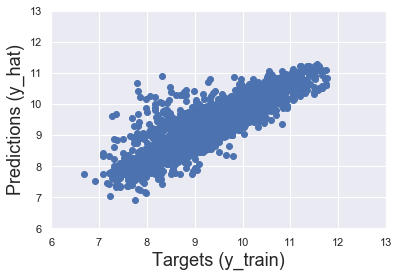

In [41]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

**Residual:** Differences between the targets and the predictions

Text(0.5, 1.0, 'Residual PDF')

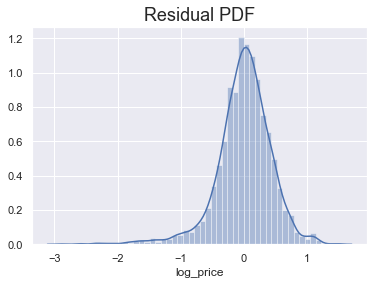

In [42]:
sns.distplot(y_train - y_hat)
plt.title('Residual PDF', size=18)

From the errors assumptions we know that the mean must be zero and the residuals are the estimators of the errors.

From the plot it can be seen that Mean is 0, 
- but plot is of left skew or There are certain observations for which (y_train - y_hat) is much lower than the mean i.e,. the prediction is over estimatted from the targets. 
- for the right side there are no observations, so we can predict that rarely under estimatted from targets.

In [43]:
reg.score(x_train, y_train) #R-Square value

0.744996578792662

In [44]:
reg.intercept_

9.415239458021299

In [45]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

Lets create a summry table for weights and bias to view it clearly

In [46]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_

In [47]:
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


This model is frm interpretable , because the Weights are in log values and all the features are standardized including dummy variables, 

**Weights interpretation**

1. Continuous variables:
    1. A *Positive weight* shows that as a feature increases in the value, so do the log_price and 'Price' respectively
    2. A *Negative Weight* shows that as a feature increases in the value, log_price and 'Price' decrease

Let's consider Brands for instance:

In [48]:
data_cleaned['Brand'].unique() # unique brands list before creating dummies

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

From the above table we can see that the all brands are present except the Audi, since the Brand Audi is 1 when all other are 0, Audi cars are Benchmark
2. Dummy variables:
    1. A *positive weight* shows that the respective category(Brand) is more expensive than the benchmark (Audi), for instance Brand BMW is positive so the price of BMW cars are more than Audi, Brand Renault cars is negative therefore the price of Renault cars are less than Audi cars.
    2. A *Negative weight* shows that the respective category(Brand is less expensive than the benchmark(Audi).
    
Lets consider Body variable:

In [49]:
data_cleaned['Body'].unique() #unique bodys list before creating dummies

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

From the above table we can see all the other bodies except 'crossover', since the body crossover is 1 when all other are 0, crossover body cars are Benchmark.

In [50]:
data_cleaned['Engine Type'].unique() #unique Engine Types list before creating dummies

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

From the above table we can see all the other Engine Types except 'Diesel', since the Engine Type Diesel is 1 when all other are 0, Diesel cars are Benchmark.

In [51]:
data_cleaned['Registration'].unique()

array(['yes', 'no'], dtype=object)

From the above table we can see all the other Registration except 'no', since the Registration 'no' is 1 when all other are 0, Registration 'No' cars are Benchmark.

## Testing
Lets predict and plot for test data:


In [52]:
y_hat_test = reg.predict(x_test)

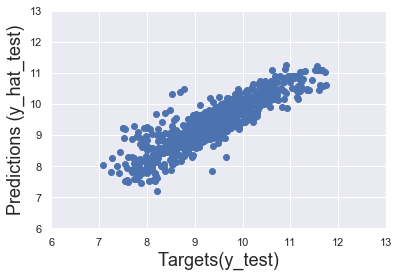

In [53]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets(y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

The Above plot looks quite descent, 
- for higher prices the predictions are close to 45 degree, our model is very good at predicting higher prices
- for lower prices the predictions are above the 45 degree line, they are much scattered.

Lets introduce *alpha* concept: *plt.scatter(x,y[, alpha])* creates a scatter plot, *alpha:* specifies the opacity( alpha takes the values from 0-1).

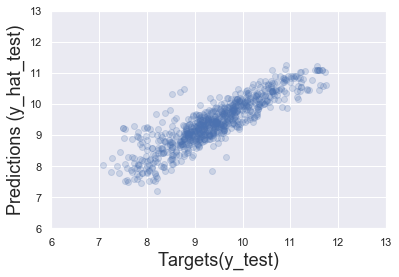

In [54]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets(y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

The above plot, The more saturated the color, the higher the concentration.

Thus the most of the points are closer to 45 degree line.

In [55]:
# dataframe performance
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf.head()

,Prediction
0,9.276643
1,8.160305
2,8.929738
3,8.917842
4,9.337280


The above data is of Log values, to get the actual values we have to apply the exponential to log values,

    exp(ln(x)) = |x|
    log(exp(x)) = x
 
np.exp(x) returns the exponential of x (the Euler number 'e' to the power of x)

In [56]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predection'])
df_pf.head()

,Predection
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


Lets put the exponential of y_test into df_pf Targets:


In [57]:
df_pf['Targets'] = np.exp(y_test)
df_pf.head()

,Predection,Targets
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN


Unfortuntelly we have lots of missing values and they are quite randomly spread.

First lets print y_test data we can see the data is with indexes, and they are random

In [58]:
y_test

1192     7.740664
3360     7.937375
2350     7.824046
3257     8.764053
892      9.121509
          ...    
1935    10.292146
3757     9.169518
3134     9.814656
1369    11.134589
2595     9.287301
Name: log_price, Length: 774, dtype: float64

Pandas tried to match the indices, but the orginal indexing is not proper so we need to reindex the data frame

In [59]:
y_test = y_test.reset_index(drop = True)
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

Now lets overwrite the y_test in Tergets of df_pf

In [60]:
df_pf['Targets'] = np.exp(y_test)
df_pf.head()

,Predection,Targets
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0


In [61]:
# The main reaseon OLS is based on minimizing SSE, lower error => better explanatory power. Therefore examining the residual is the same as examining the heart of the algorithm.
df_pf['Residual'] = df_pf['Targets'] - df_pf['Predection']


In [62]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Targets']*100)
df_pf

,Predection,Targets,Residual,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


In [63]:
df_pf.describe()

,Predection,Targets,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [64]:
df_pf.sort_values(by=['Difference%'])

,Predection,Targets,Residual,Difference%
698,30480.847838,30500.0,19.152162,0.062794
742,16960.310476,16999.0,38.689524,0.227599
60,12469.207487,12500.0,30.792513,0.246340
110,25614.137960,25500.0,-114.137960,0.447600
367,42703.676996,42500.0,-203.676996,0.479240
...,...,...,...,...
657,32481.045510,6000.0,-26481.045510,441.350758
162,9954.416247,1800.0,-8154.416247,453.023125
451,35956.498331,6500.0,-29456.498331,453.176897
532,10019.903027,1800.0,-8219.903027,456.661279


In [65]:
pd.options.display.max_rows = 999 # setting the pandas view of data to max rows
pd.set_option('display.float_format', lambda x: '%.2f' % x) # viewing the float values of upto 2 decimals
df_pf.sort_values(by=['Difference%'])

,Predection,Targets,Residual,Difference%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74


Revising this data frame manually we can see for which types of observations we've got good predictions and for which we are very far off.

Going to the bottom of the data frame we can see that there are very few predictions dramatically far from the observed values, closely look at the observed column we can see that the prices are extremely low.

As we know our model is using the mileage engine volume brand registration and body type to predict the price of a used car.

**On an average our model is pretty decent at predecting the price**


*How can we Improve our model*
1. Use a different set of variables
2. Remove a bigger part of the outliers
3. Use different kinds of transformations

*The model we have created is not outstanding, Machine Learning requires us to revisit the model many times before we are truly happ with the result.*